# Assignment 1

### 1.0: Imports

In [2]:
import pandas as pd  # For dataframe manipulation
import numpy as np  # For numerical computing
import matplotlib.pyplot as plt  # For creating plots
import seaborn as sns  # For data visualization
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_curve,
    auc,
)

## Task 1: Data Exploration

### 1.1: Loading the data

In [3]:
df = pd.read_excel("titanic3.xls")  # Loads the excel into the 'df' variable
df.head()  # Print head to check

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### 1.2: Exploratory Data Analysis

In [4]:
print("Basic dataset information")
print("_" * 50)
df.info()  # Displays basic info

Basic dataset information
__________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [5]:
print("Statistical summary of columns")
print("_" * 50)
df.describe()  # Does a statistical summary for each col

Statistical summary of columns
__________________________________________________


,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [6]:
print("Amount of missing values per column")
print("_" * 50)
df.isnull().sum()  # Puts booleans for the existence or lack of values and sums the occurences of null values by column

Amount of missing values per column
__________________________________________________


pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [7]:
categorical_cols = ["pclass", "survived", "sex", "embarked"]
print("Unique Values in categorical columns")
print("_" * 50)
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())

Unique Values in categorical columns
__________________________________________________

pclass:
pclass
3    709
1    323
2    277
Name: count, dtype: int64

survived:
survived
0    809
1    500
Name: count, dtype: int64

sex:
sex
male      843
female    466
Name: count, dtype: int64

embarked:
embarked
S    914
C    270
Q    123
Name: count, dtype: int64


#### Data Visualization

Here I will plot the passenger distributions with relevant columns, I will skip columns like ticket id or name as I do not believe they had any correlation to the survival rate.

<function matplotlib.pyplot.show(close=None, block=None)>

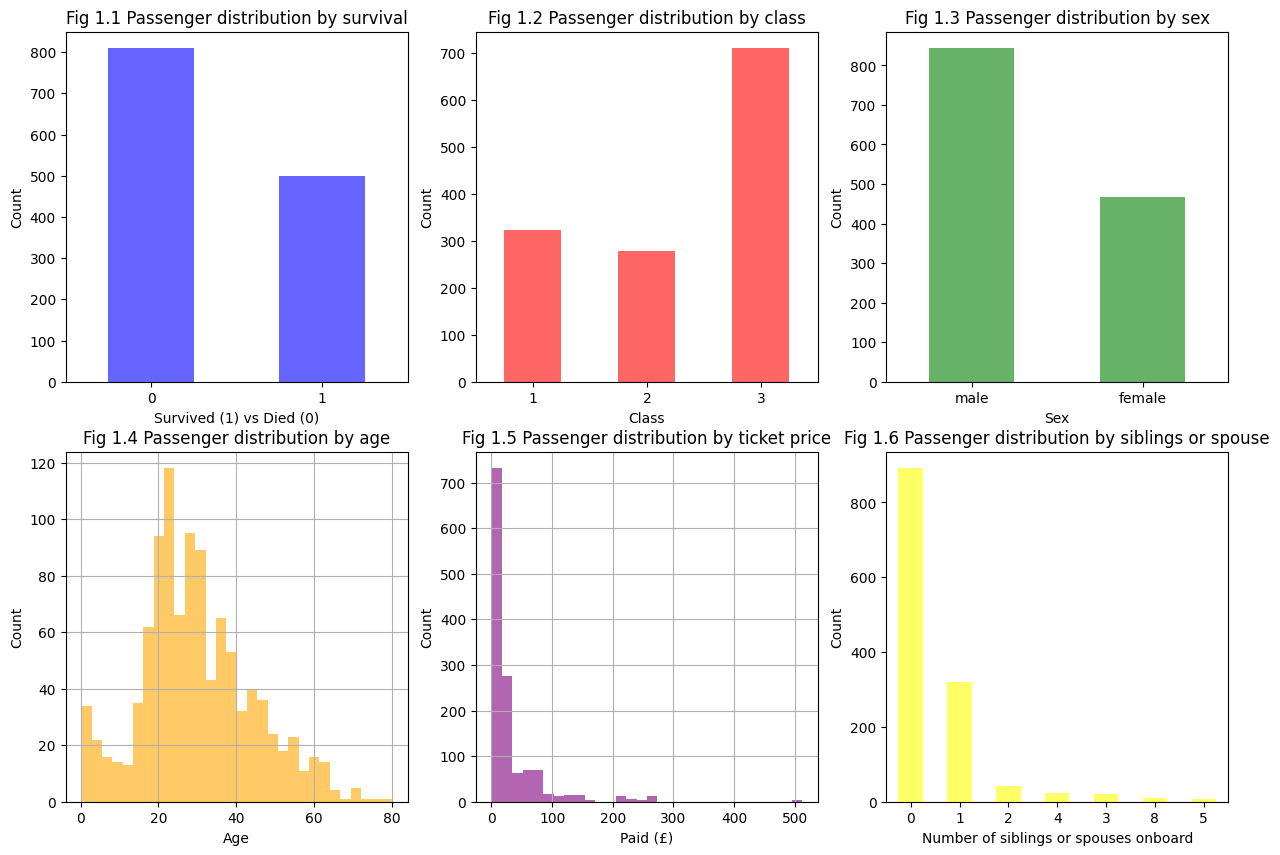

In [8]:
plt.figure(figsize=(15, 10))

# 1. Survival Distribution
plt.subplot(2, 3, 1)
df["survived"].value_counts().plot(kind="bar", color="blue", alpha=0.6)
plt.title("Fig 1.1 Passenger distribution by survival")
plt.xlabel("Survived (1) vs Died (0)")
plt.ylabel("Count")
plt.xticks(rotation=0)

# 2. Class Distribution
plt.subplot(2, 3, 2)
df["pclass"].value_counts().sort_index().plot(kind="bar", color="red", alpha=0.6)
plt.title("Fig 1.2 Passenger distribution by class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=0)

# 3. Gender Distribution
plt.subplot(2, 3, 3)
df["sex"].value_counts().plot(kind="bar", color="green", alpha=0.6)
plt.title("Fig 1.3 Passenger distribution by sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.xticks(rotation=0)

# 4. Age Distribution
plt.subplot(2, 3, 4)
df["age"].hist(bins=30, color="orange", alpha=0.6)
plt.title("Fig 1.4 Passenger distribution by age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.xticks(rotation=0)

# 5. Fare Distribution
plt.subplot(2, 3, 5)
df["fare"].hist(bins=30, color="purple", alpha=0.6)
plt.title("Fig 1.5 Passenger distribution by ticket price")
plt.xlabel("Paid (£)")
plt.ylabel("Count")

# 6. Sibling or spouse Distribution
plt.subplot(2, 3, 6)
df["sibsp"].value_counts().plot(kind="bar", color="yellow", alpha=0.6)
plt.title("Fig 1.6 Passenger distribution by siblings or spouse")
plt.xlabel("Number of siblings or spouses onboard")
plt.ylabel("Count")
plt.xticks(rotation=0)

plt.tight_layout
plt.show

Some conclusions that can be drawn are that all passenger distribution graphs seem to be skewed. I will go into what this means for each.

- Fig 1.1 shows the distribution of passengers by survival. The graph is right-skewed, with more passengers not surviving than surviving. This indicates that the majority of passengers (approximately 62%) died in the disaster.

- Fig 1.2 shows the distribution of passengers by class. The graph is left-skewed, with more passengers in 3rd class than in 1st or 2nd. This reflects the class structure, where the 3rd class accommodated more passengers.

- Fig 1.3 shows the distribution by sex. The graph shows an uneven distribution with more male passengers than female passengers. This could show the underlying social norms of the time as a quick google confirms that men were more likely to travel during that time, especially for business reasons.

- Fig 1.4 shows the age distribution. The graph appears to be slightly right-skewed with most passengers being young adults between 20-40 years old. There are less elderly passengers and children.

- Fig 1.5 shows the ticket price distribution. The graph is heavily right-skewed with a long tail, indicating that while most passengers paid lower fares, there were some who paid significantly higher amounts, possibly for first-class accommodation.

- Fig 1.6 shows the distribution of siblings/spouses. The graph is extremely right-skewed, showing that most passengers traveled either alone or with just one sibling/spouse. Very few passengers traveled with multiple family members.

#### Data Visualization of survival based on different features

Here I thought that it would be interesting to plot the rates of survival based on different features, I used chatGPT to make the graphs more visually appealing.

<function matplotlib.pyplot.show(close=None, block=None)>

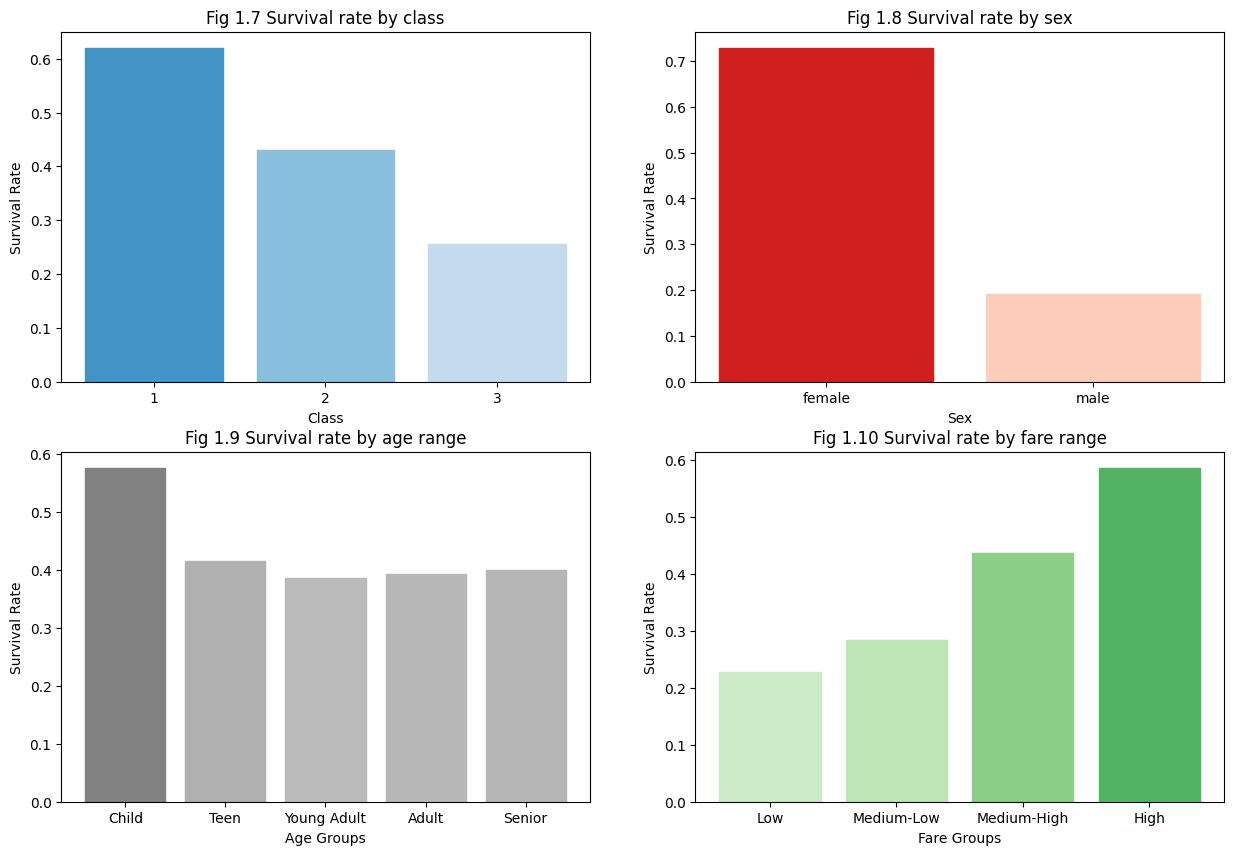

In [9]:
plt.figure(figsize=(15, 10))

# 1. Survival by class
plt.subplot(2, 2, 1)
ax1 = plt.gca()
survival_by_class = df.groupby("pclass")["survived"].mean()
bars1 = ax1.bar(range(len(survival_by_class)), survival_by_class)
for bar in bars1:
    bar.set_color(plt.cm.Blues(bar.get_height()))
plt.title("Fig 1.7 Survival rate by class")
plt.xlabel("Class")
plt.ylabel("Survival Rate")
plt.xticks(range(len(survival_by_class)), survival_by_class.index, rotation=0)

# 2. Survival by sex
plt.subplot(2, 2, 2)
ax2 = plt.gca()
survival_by_sex = df.groupby("sex")["survived"].mean()
bars2 = ax2.bar(range(len(survival_by_sex)), survival_by_sex)
for bar in bars2:
    bar.set_color(plt.cm.Reds(bar.get_height()))
plt.title("Fig 1.8 Survival rate by sex")
plt.xlabel("Sex")
plt.ylabel("Survival Rate")
plt.xticks(range(len(survival_by_sex)), survival_by_sex.index, rotation=0)

# 3. Survival by Age
plt.subplot(2, 2, 3)
df["age_group"] = pd.cut(
    df["age"],
    bins=[0, 12, 18, 35, 50, 100],
    labels=["Child", "Teen", "Young Adult", "Adult", "Senior"],
)
ax3 = plt.gca()
survival_by_age = df.groupby("age_group", observed=True)["survived"].mean()
bars3 = ax3.bar(range(len(survival_by_age)), survival_by_age)
for bar in bars3:
    bar.set_color(plt.cm.Greys(bar.get_height()))
plt.title("Fig 1.9 Survival rate by age range")
plt.xlabel("Age Groups")
plt.ylabel("Survival Rate")
plt.xticks(range(len(survival_by_age)), survival_by_age.index, rotation=0)

# 4. Survival by Fare
plt.subplot(2, 2, 4)
df["fare_range"] = pd.qcut(
    df["fare"], q=4, labels=["Low", "Medium-Low", "Medium-High", "High"]
)
ax4 = plt.gca()
survival_by_fare = df.groupby("fare_range", observed=True)["survived"].mean()
bars4 = ax4.bar(range(len(survival_by_fare)), survival_by_fare)
for bar in bars4:
    bar.set_color(plt.cm.Greens(bar.get_height()))
plt.title("Fig 1.10 Survival rate by fare range")
plt.xlabel("Fare Groups")
plt.ylabel("Survival Rate")
plt.xticks(range(len(survival_by_fare)), survival_by_fare.index, rotation=0)

plt.tight_layout
plt.show

It seems there are some interesting correlations present (cannot draw causal conclusions due to lack of data), namely passengers from more lxurious classes had a higher rate of survival. This can also be seen in the survival rate by fares as the luxury classes correspond to ticket prices. 

Surpisingly, it seems that there is no significant difference in survival rates between age groups, excluding the children. 

Lastly, women had a significantly higher rate of survival which is possibly related to the evacuation measures taken that gave children and women higher priority.

#### Outliers

I will also try to plot outliers even though I am not sure on how to deal with them for now. I will use them for future processes.

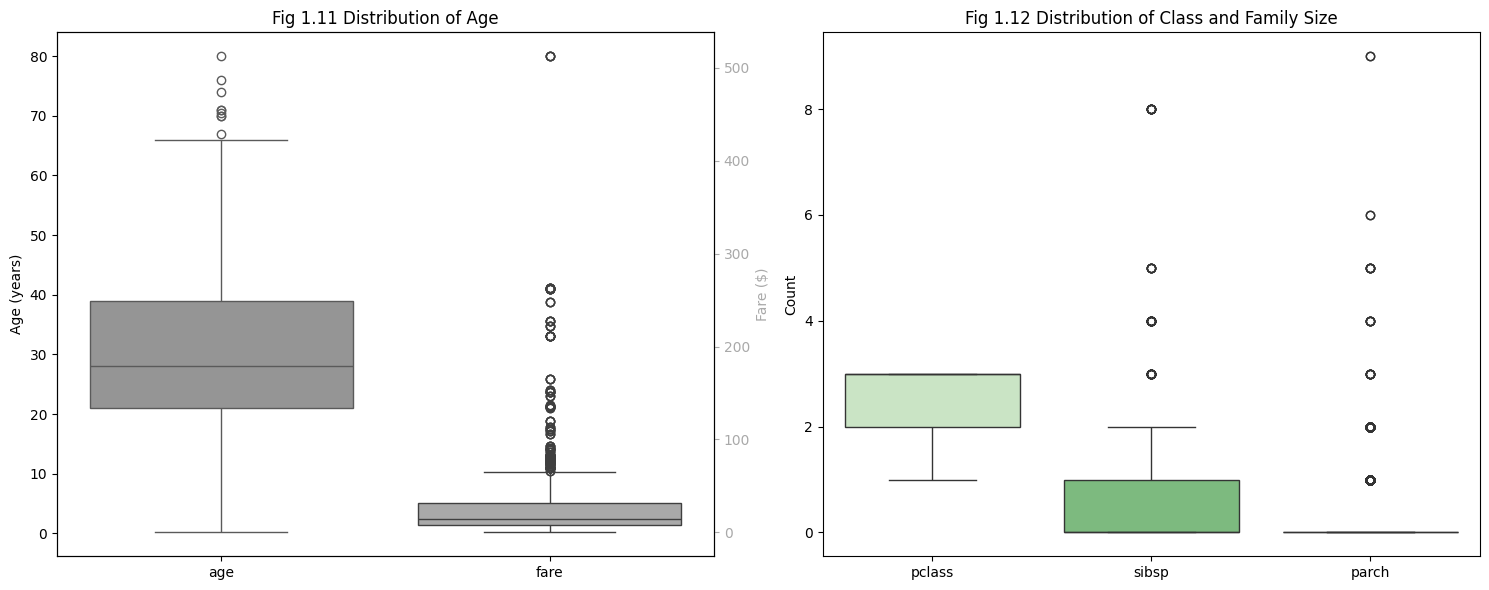

Number of outliers in each numerical column
age: 9 outliers
fare: 171 outliers
sibsp: 57 outliers
parch: 307 outliers


In [10]:
plt.figure(figsize=(15, 6))

# Box plot for Age and Fare
plt.subplot(1, 2, 1)
ax1 = plt.gca()
sns.boxplot(data=df[["age"]], ax=ax1, palette="Greys")
plt.title("Fig 1.11 Distribution of Age")
plt.ylabel("Age (years)")

ax1_2 = ax1.twinx()
sns.boxplot(data=df[["fare"]], ax=ax1_2, color="darkgrey")
ax1_2.set_ylabel("Fare ($)", color="darkgrey")
ax1_2.tick_params(axis="y", colors="darkgrey")

# Box Plot for Class and Family Size
plt.subplot(1, 2, 2)
ax2 = plt.gca()
sns.boxplot(data=df[["pclass", "sibsp", "parch"]], ax=ax2, palette="Greens")
plt.title("Fig 1.12 Distribution of Class and Family Size")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return len(outliers)


print("Number of outliers in each numerical column")
for col in ["age", "fare", "sibsp", "parch"]:
    n_outliers = detect_outliers(df, col)
    print(f"{col}: {n_outliers} outliers")

#### Correlation Matrix

For the last part of my EDA I decided to do a correlation matrix. I googled what other things I can include and I saw that I could do a matrix for the correlations.

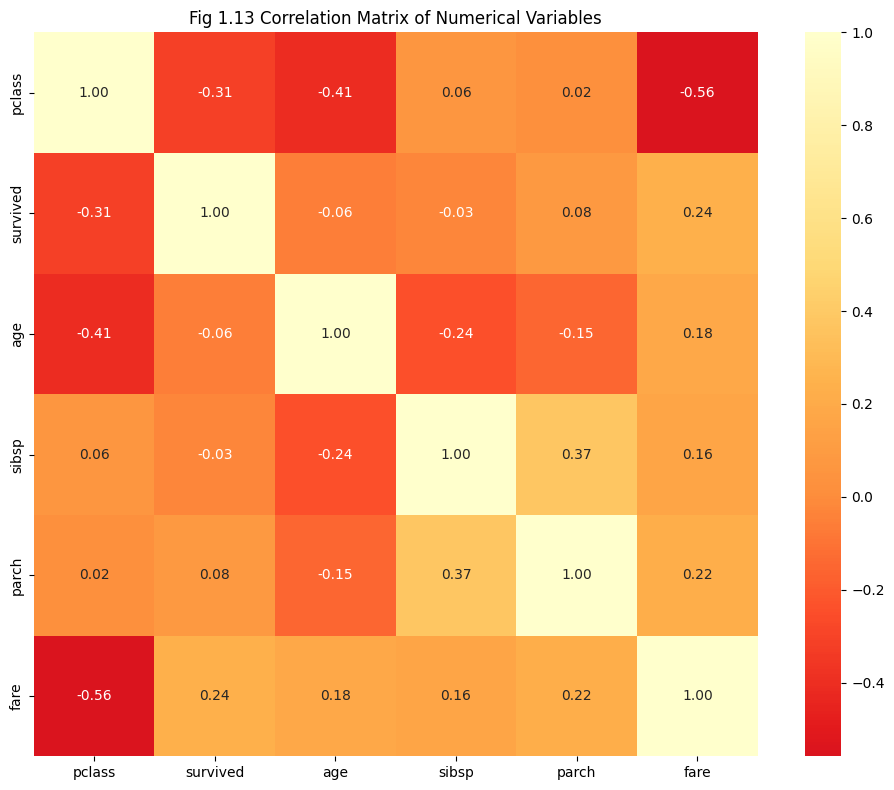

In [11]:
plt.figure(figsize=(10, 8))
numerical_cols = ["pclass", "survived", "age", "sibsp", "parch", "fare"]
correlation_matrix = df[numerical_cols].corr()

# Correlation Matrix
sns.heatmap(
    correlation_matrix, annot=True, cmap="YlOrRd_r", center=0, fmt=".2f", square=True
)

plt.title("Fig 1.13 Correlation Matrix of Numerical Variables")
plt.tight_layout()
plt.show()

The correlation matrix provides important information about the relationships between numerical variables in the dataset. I will list some interesting inferences below.

1. Survival Correlations:
   - There is a moderate negative correlation (-0.34) between passenger class and survival, suggesting that passengers in higher classes were more likely to survive.
   - A weak positive correlation (0.07) exists between age and survival, indicating age had minimal impact on survival chances.
   - Fare shows a positive correlation (0.26) with survival, supporting our earlier observation that passengers who paid more had better survival rates.

2. Other interesting Correlations:
   - There's a strong negative correlation (-0.55) between passenger class and fare, which is expected as higher classes had more expensive tickets.
   - Siblings/Spouse and Parents/Children show a weak positive correlation (0.37), suggesting some families traveled together.
   - Age shows very weak correlations with most variables, except for a slight negative correlation with sibsp (-0.31) and parch (-0.19), indicating younger passengers were more likely to travel with family.

3. Overall Patterns:
   - Most correlations in the dataset are relatively weak (below 0.4), suggesting that many variables acted somewhat independently.
   - The strongest correlations are between class-fare and family-related variables.

## Task 2: Managing Missing Values

### 2.1: Missing Value Heatmap

We start off with a missing value heatmap to better visualize the distribution of the missing values in the columns.

Missing Value Analysis:
            Missing Values  Percentage
age                    263   20.091673
fare                     1    0.076394
cabin                 1014   77.463713
embarked                 2    0.152788
boat                   823   62.872422
body                  1188   90.756303
home.dest              564   43.086325
age_group              263   20.091673
fare_range               1    0.076394


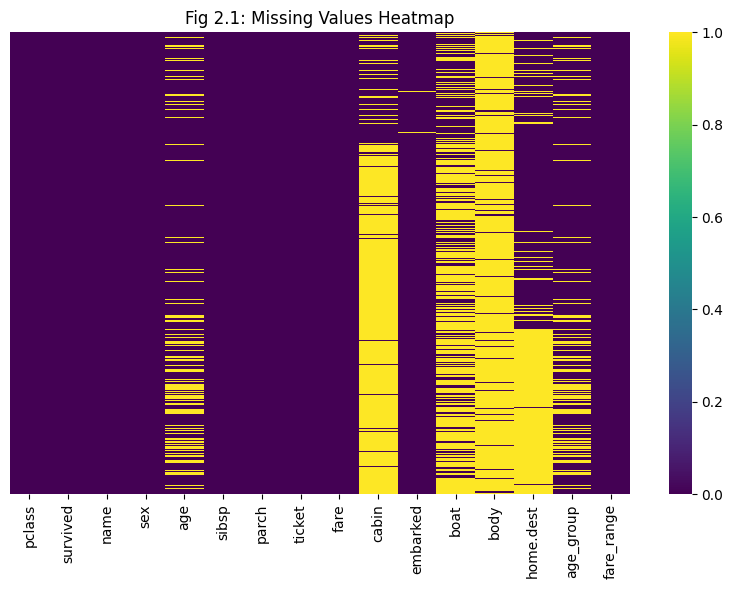

In [12]:
def analyze_missing_values(df, fig_num):
    missing_values = df.isnull().sum()
    missing_percentages = (missing_values / len(df)) * 100

    missing_info = pd.DataFrame(
        {"Missing Values": missing_values, "Percentage": missing_percentages}
    )

    print("Missing Value Analysis:")
    print(missing_info[missing_info["Missing Values"] > 0])

    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap="viridis")
    plt.title(f"Fig {fig_num}: Missing Values Heatmap")
    plt.show()


analyze_missing_values(df, 2.1)

### 2.2: Dropping Columns with Missing Values

From the heatmap we can see that the columns with the most missing values are cabin, boat, body and home.dest. For that reason we will drop them since some also lack a logical significance for being predictors in the survival status of a passenger. 

Additionally, using a similar approach we will also drop some columns that have no relevance in predicting from the columns with no missing values, such as the name and the ticket.



Missing Value Analysis:
          Missing Values  Percentage
age                  263   20.091673
fare                   1    0.076394
embarked               2    0.152788


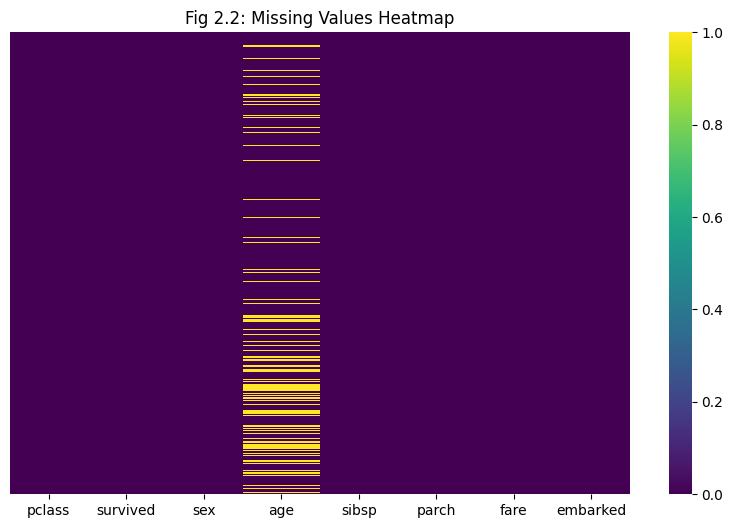

In [13]:
df_cleaned = df.drop(
    columns=[
        "cabin",
        "boat",
        "body",
        "name",
        "ticket",
        "home.dest",
        "age_group",
        "fare_range",
    ]
)
analyze_missing_values(df_cleaned, 2.2)

### 2.3: Splitting the Data and Handling Missing Values

Now we just have to split the data into training, validation and test sets and then handle the missing values in the remaining columns.

In [14]:
X = df_cleaned.drop(columns=["survived"])
y = df_cleaned["survived"]

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

numeric_features = ["age", "fare"]
categorical_features = ["sex", "embarked", "pclass"]

print("\nMissing values in training set before imputation:")
print(X_train.isnull().sum())

num_imputer = SimpleImputer(strategy="median")
X_train[numeric_features] = num_imputer.fit_transform(X_train[numeric_features])
X_val[numeric_features] = num_imputer.transform(X_val[numeric_features])
X_test[numeric_features] = num_imputer.transform(X_test[numeric_features])

cat_imputer = SimpleImputer(strategy="most_frequent")
X_train[categorical_features] = cat_imputer.fit_transform(X_train[categorical_features])
X_val[categorical_features] = cat_imputer.transform(X_val[categorical_features])
X_test[categorical_features] = cat_imputer.transform(X_test[categorical_features])

print("\nMissing values in training set after imputation:")
print(X_train.isnull().sum())
print("\nTrain-Validation-Test Split:")
print(f"Training set size: {len(X_train)} samples")
print(f"Validation set size: {len(X_val)} samples") 
print(f"Test set size: {len(X_test)} samples")


Missing values in training set before imputation:
pclass        0
sex           0
age         190
sibsp         0
parch         0
fare          1
embarked      0
dtype: int64

Missing values in training set after imputation:
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

Train-Validation-Test Split:
Training set size: 916 samples
Validation set size: 196 samples
Test set size: 197 samples


## Task 3: Encoding Categorical Variables

### 3.1: Encoding Categorical Variables

Now that we handled the missing values and we split the data, we can move on to handling the categorical variables which consists of turning the categorical variables into numerical ones. This is necessary for the model to understand the data, since it can't operate on strings. 

In [15]:
encoder = OneHotEncoder(drop="first", sparse_output=False)
categorical_features = ["sex", "embarked", "pclass"]
X_train_cat = encoder.fit_transform(X_train[categorical_features])
X_val_cat = encoder.transform(X_val[categorical_features])
X_test_cat = encoder.transform(X_test[categorical_features])

### 3.2: Converting to DataFrame Format


In [16]:
# Convert back to DataFrame format
X_train_cat = pd.DataFrame(
    X_train_cat, columns=encoder.get_feature_names_out(), index=X_train.index
)
X_val_cat = pd.DataFrame(
    X_val_cat, columns=encoder.get_feature_names_out(), index=X_val.index
)
X_test_cat = pd.DataFrame(
    X_test_cat, columns=encoder.get_feature_names_out(), index=X_test.index
)

### 3.3: Dropping Original Categorical Columns and Adding Encoded Ones

In [17]:
# Drop original categorical columns and add new encoded columns
X_train = X_train.drop(columns=categorical_features)
X_val = X_val.drop(columns=categorical_features)
X_test = X_test.drop(columns=categorical_features)

X_train = pd.concat([X_train, X_train_cat], axis=1)
X_val = pd.concat([X_val, X_val_cat], axis=1)
X_test = pd.concat([X_test, X_test_cat], axis=1)

## Task 4: Feature Scaling

For this step I standardized and normalized the numerical features. This was done to avoid more weight being given to the features with higher values.

### 4.1: Standardizing 

In [18]:
# Standardizing
scaler = StandardScaler()
X_train[["age", "fare", "sibsp", "parch"]] = scaler.fit_transform(
    X_train[["age", "fare", "sibsp", "parch"]]
)
X_val[["age", "fare", "sibsp", "parch"]] = scaler.transform(
    X_val[["age", "fare", "sibsp", "parch"]]
)
X_test[["age", "fare", "sibsp", "parch"]] = scaler.transform(
    X_test[["age", "fare", "sibsp", "parch"]]
)

### 4.2: Normalizing

In [19]:
# Normalizing numerical variables
min_max_scaler = MinMaxScaler()
X_train[["age", "fare", "sibsp", "parch"]] = min_max_scaler.fit_transform(
    X_train[["age", "fare", "sibsp", "parch"]]
)
X_val[["age", "fare", "sibsp", "parch"]] = min_max_scaler.transform(
    X_val[["age", "fare", "sibsp", "parch"]]
)
X_test[["age", "fare", "sibsp", "parch"]] = min_max_scaler.transform(
    X_test[["age", "fare", "sibsp", "parch"]]
)

## Task 5: Data Splitting

This step was already done in task 2. I chose to do this in order to have the data split before handling the missing valus in the columns that I wanted kept, such as the fare, embarked and age columns. That way I could avoid data leakage and have a more accurate model.

## Task 6: Addressing Class Imbalance

For this task I will use the SMOTE method to address the class imbalance. It's suposed to create synthetic samples for the minority class in orderto balance the dataset.

In [20]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

## Task 7: Feature Selection


Here I will remove features that have low variance in order to reduce the dimensionality of the data, so that we have no irrelevant features in the model.

In [21]:
selector = VarianceThreshold(threshold=0.01)
X_train_selected = selector.fit_transform(X_train_smote)
X_val_selected = selector.transform(X_val)
X_test_selected = selector.transform(X_test)

To answer why steps 6 and 7 were necessary I will start off by saying that we carry out these steps after splitting the dataset to avoid data leakage. 

Additionally by performing these steps only on the training data after splitting:
 - We maintain true independence of the test set
 - The model's performance on test data better reflects real-world performance
 - We avoid  optimistic evaluation metrics


## Task 8: Training Logistic Regression Model


Now for the final step I will train the model. To be quite honest I am not sure on how to evaluate the model efficiently, and since it is not the main scope of this assignment I had chatGPT help me with the evaluation part.

In [22]:
model = LogisticRegression()
model.fit(X_train_selected, y_train_smote)

y_pred = model.predict(X_val_selected)
print("Prediction Results:")
print("_" * 24)
for pred, actual in list(zip(y_pred, y_val))[:10]:
    print(f"Actual: {actual} | Predicted: {pred}")

Prediction Results:
________________________
Actual: 0 | Predicted: 0
Actual: 0 | Predicted: 0
Actual: 1 | Predicted: 0
Actual: 0 | Predicted: 1
Actual: 1 | Predicted: 0
Actual: 1 | Predicted: 1
Actual: 0 | Predicted: 0
Actual: 0 | Predicted: 0
Actual: 0 | Predicted: 0
Actual: 1 | Predicted: 0


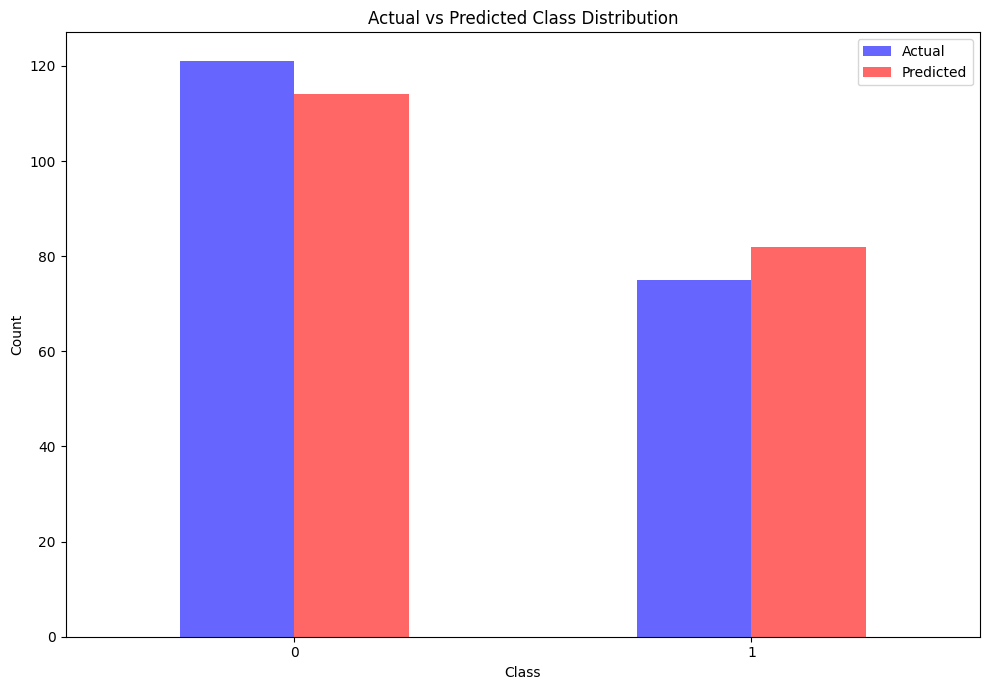

In [23]:
results_df = pd.DataFrame({
    'Actual': y_val,
    'Predicted': y_pred
})

fig, ax = plt.subplots(figsize=(10, 7))

results_comparison = pd.DataFrame({
    'Actual': results_df['Actual'].value_counts(),
    'Predicted': results_df['Predicted'].value_counts()
}).sort_index()

results_comparison.plot(kind='bar', ax=ax, alpha=0.6, color=['blue', 'red'])
ax.set_title('Actual vs Predicted Class Distribution')
ax.set_xlabel('Class')
ax.set_ylabel('Count')
ax.legend(loc='upper right')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



Model Performance Metrics:
Accuracy: 0.811
Precision: 0.732
Recall: 0.800
F1 Score: 0.764


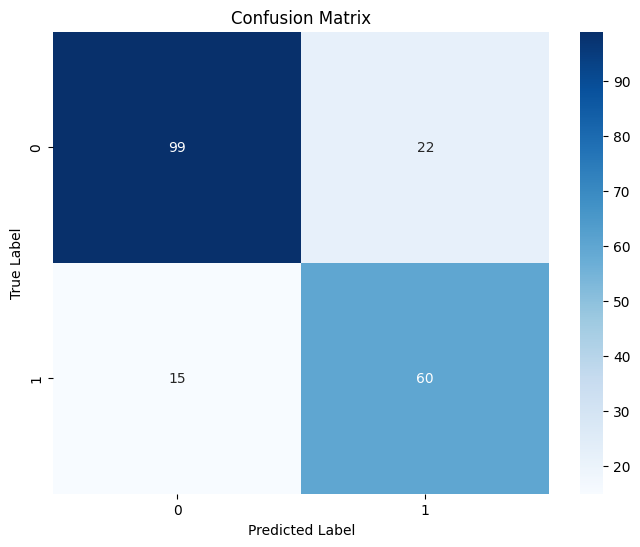

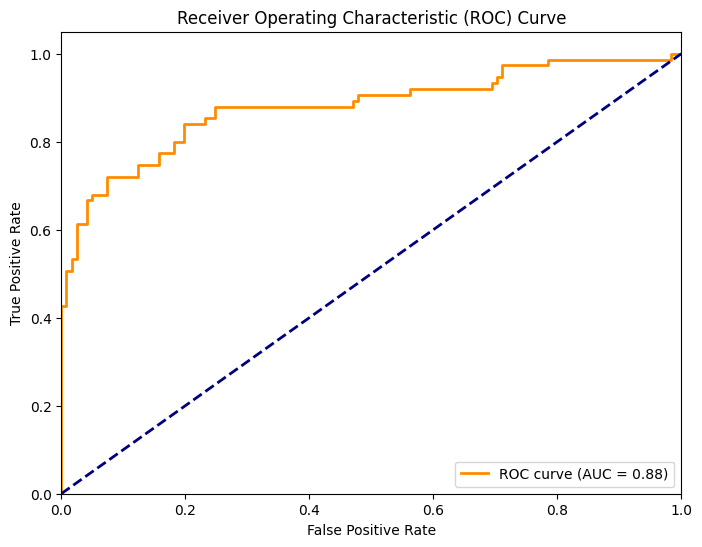

In [24]:
# Evaluate model performance
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("\nModel Performance Metrics:")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

# Generate confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

# Plot ROC curve
y_pred_proba = model.predict_proba(X_val_selected)[:, 1]
fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

Looking at the ROC curve we can see that the model has a good balance between precision and recall, and the AUC is 0.88 which is good.

Perhaps the model could be improved by using a different model, or by tuning the hyperparameters.
